# **Jacob Shearer - Final Project**

In [1]:
import random
import numpy as np
import scipy.fft as fft
import scipy.stats as stats
import scipy.signal as spsig
import matplotlib.pyplot as plt

In [2]:
def test_signal(n_sample_points, sample_spacing):
    sampling_times = np.linspace(0.0, n_sample_points*sample_spacing, n_sample_points)
    A = 1
    analog_signal = lambda t:A*(np.sin(4*t) + np.sin(5*t) + np.sin(6*t))
    digital_signal = analog_signal(sampling_times)
    return sampling_times, digital_signal

In [3]:
def ft(n_sample_points, sample_spacing, times, signal):
    frequencies = fft.fftfreq(n_sample_points, sample_spacing)
    signal_fft = fft.fft(signal)
    return frequencies, signal_fft

In [4]:
def ift(signal_fft):
    signal = np.real(fft.ifft(signal_fft))
    return signal

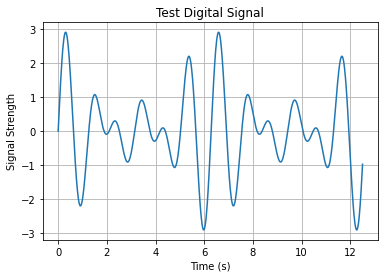

In [5]:
n_sample_points = 1000
sample_spacing = 1/80
times, signal = test_signal(n_sample_points, sample_spacing)
plt.plot(times, signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Test Digital Signal')
plt.grid()
plt.show()

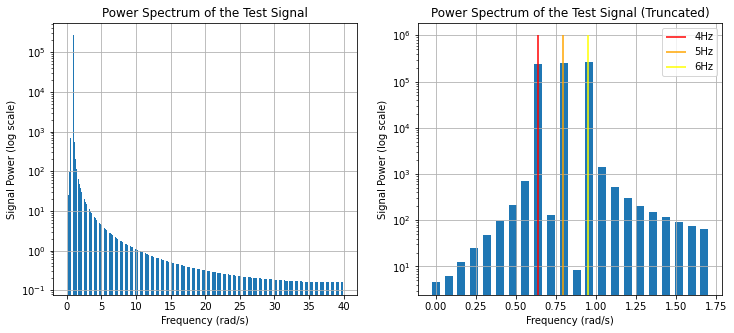

In [112]:
frequencies, signal_fft = ft(n_sample_points, sample_spacing, times, signal)
power_spectrum = np.abs(signal_fft)**2

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

# Cutting out the negative frequencies because, for the FT of real-valued functions, all of these negative frequencies 
# are mirror images of their positive counterparts.
ax1.bar(frequencies[:int(len(frequencies)/2)], power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_title('Power Spectrum of the Test Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/45)], power_spectrum[:int(len(frequencies)/45)], width=0.05)
ax2.vlines([4/(2*np.pi)], 0, 1e6, colors=('r'), label='4Hz')
ax2.vlines([5/(2*np.pi)], 0, 1e6, colors=('orange'), label='5Hz')
ax2.vlines([6/(2*np.pi)], 0, 1e6, colors=('yellow'), label='6Hz')
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.legend()
ax2.set_title('Power Spectrum of the Test Signal (Truncated)')
ax2.grid()
plt.show()

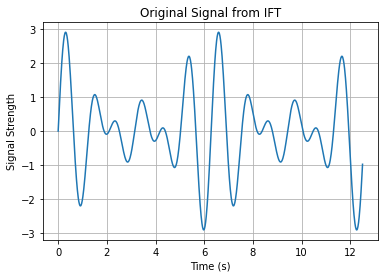

In [7]:
original_signal = ift(signal_fft)
plt.plot(times, original_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Original Signal from IFT')
plt.grid()
plt.show()

In [8]:
def add_noise(signal, noise_amplitude, seed_n=None):
    if seed_n is not None:
        np.random.seed(seed_n)
    
    noise_function = lambda: noise_amplitude*np.random.normal(0, 1)
    noisy_signal = np.zeros(len(signal))
    for i in range(len(signal)):
        noisy_signal[i] = signal[i] + noise_function()
    
    return noisy_signal

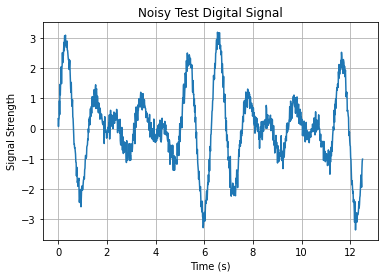

In [9]:
n_sample_points = 1000
sample_spacing = 1/80
times, signal = test_signal(n_sample_points, sample_spacing)
seed_n = 1
noise_amplitude = 0.2
noisy_signal = add_noise(signal, noise_amplitude, seed_n)
plt.plot(times, noisy_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Noisy Test Digital Signal')
plt.grid()
plt.show()

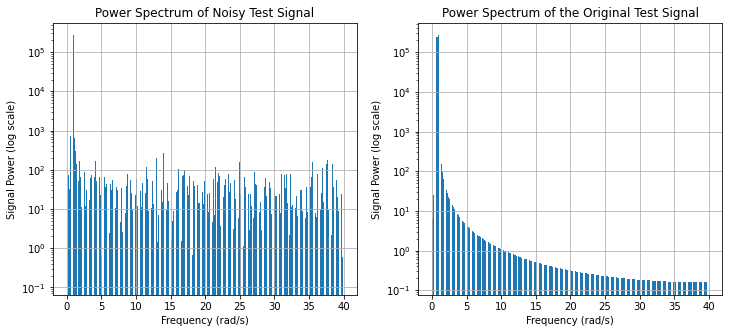

In [10]:
frequencies, noisy_signal_fft = ft(n_sample_points, sample_spacing, times, noisy_signal)
noisy_power_spectrum = np.abs(noisy_signal_fft)**2

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(frequencies[:int(len(frequencies)/2)], noisy_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_title('Power Spectrum of Noisy Test Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/2)], power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.set_title('Power Spectrum of the Original Test Signal')
ax2.grid()

plt.show()

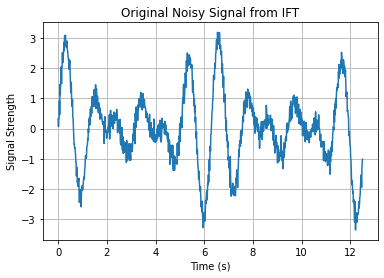

In [11]:
original_noisy_signal = ift(noisy_signal_fft)
plt.plot(times, original_noisy_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Original Noisy Signal from IFT')
plt.grid()
plt.show()

In [12]:
def autocorrelation(signal):
    length = len(signal)
    autocorrelation_array = []
    for tau in np.arange(0, length):
        correlation = np.sum(signal[:(length-tau)] * signal[tau:])
        autocorrelation_array.append(correlation)
    
    autocorrelation_array = np.array(autocorrelation_array)
    return autocorrelation_array[::-1]

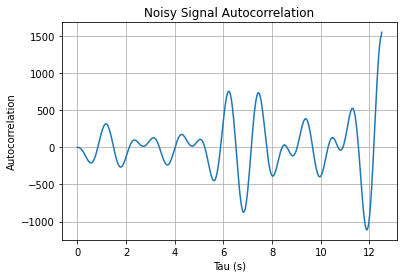

In [13]:
noisy_signal_autoc = autocorrelation(noisy_signal)
plt.plot(times, noisy_signal_autoc)
plt.xlabel('Tau (s)')
plt.ylabel('Autocorrelation')
plt.title('Noisy Signal Autocorrelation')
plt.grid()
plt.show()

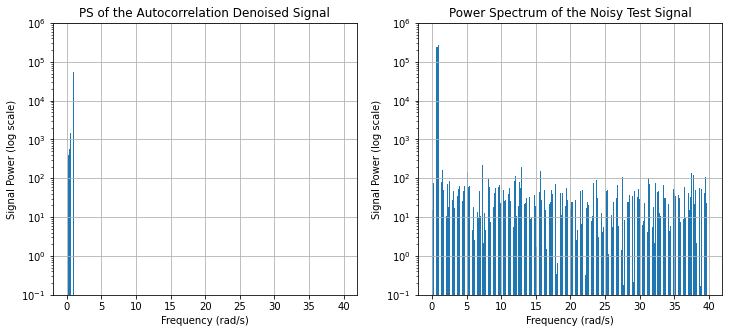

In [110]:
n_sample_points = 1000
sample_spacing = 1/80
autoc_frequencies, autoc_ft = ft(n_sample_points, sample_spacing, times, noisy_signal_autoc)
autoc_power_spectrum = np.real(autoc_ft)/np.sqrt(2*np.pi)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12, 5))

ax1.bar(autoc_frequencies[:int(len(frequencies)/2)], autoc_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_ylim(1e-1, 1e6)
ax1.set_title('PS of the Autocorrelation Denoised Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/2)], noisy_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.set_ylim(1e-1, 1e6)
ax2.set_title('Power Spectrum of the Noisy Test Signal')
ax2.grid()

plt.show()

In [15]:
def windowed_sinc(times, cutoff_freq):
    m = len(times)
    filter_array = []
    for i in range(0, m):
        denom = i - m/2
        if denom == 0:
            h = 2*np.pi*cutoff_freq
        else:
            hamming_window = (0.54 - 0.46*np.cos(2*np.pi*(i/m)))
            h = (np.sin(2*np.pi*cutoff_freq*(i-m/2))/denom)*hamming_window
        
        filter_array.append(h)
    
    return filter_array/np.sum(filter_array)

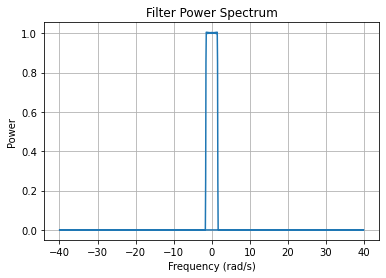

In [107]:
cutoff_freq = 1.6
n_sample_points = 1000
sample_spacing = 1/80
filter_array = windowed_sinc(times, cutoff_freq*sample_spacing)
frequencies, filter_ft = ft(n_sample_points, sample_spacing, times, filter_array)
frequencies, noisy_signal_ft = ft(n_sample_points, sample_spacing, times, noisy_signal)
convolution = filter_ft * noisy_signal_ft
convolution_power_spectrum = np.abs(convolution)**2

plt.plot(frequencies, np.abs(filter_ft)**2)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Power')
plt.title('Filter Power Spectrum')
plt.grid()
plt.show()

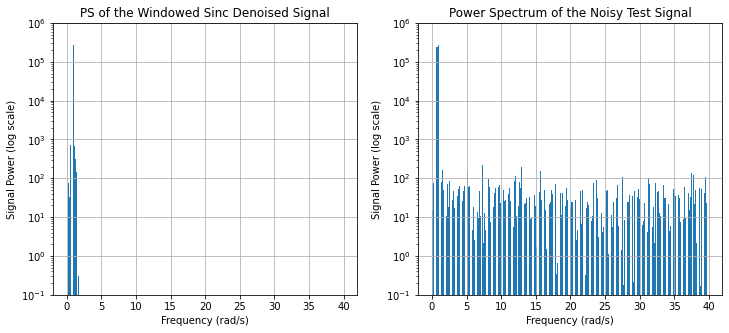

In [109]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12, 5))

ax1.bar(frequencies[:int(len(frequencies)/2)], convolution_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_ylim(1e-1, 1e6)
ax1.set_title('PS of the Windowed Sinc Denoised Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/2)], noisy_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.set_ylim(1e-1, 1e6)
ax2.set_title('Power Spectrum of the Noisy Test Signal')
ax2.grid()

plt.show()

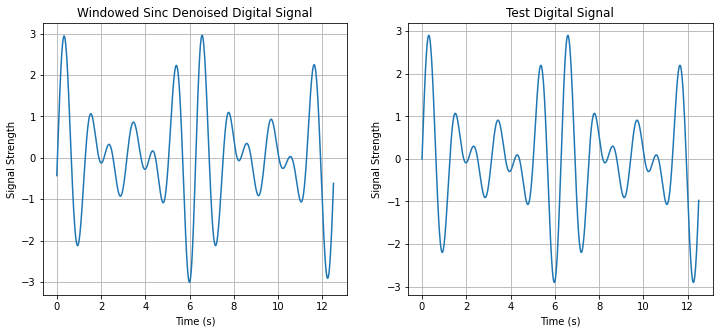

In [102]:
convolution_ift = ift(convolution)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(times, convolution_ift)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Signal Strength')
ax1.set_title('Windowed Sinc Denoised Digital Signal')
ax1.grid()


ax2.plot(times, signal)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Signal Strength')
ax2.set_title('Test Digital Signal')
ax2.grid()

plt.show()